# Import Libraries

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [81]:
motor_vehicle = pd.read_csv("filtered_motor_vehicle_collisions_2020_onwards.csv")
motor_vehicle

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,PUBLIC_PROPERTY_DAMAGE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,TRAVEL_DIRECTION_CODE
0,19693299,4322349,2020-06-22,18:10,7675ccbe-68b6-4842-8998-ebe005cc0d5d,NY,Van,TOYT-TRUCK/BUS,East,1.0,M,Licensed,NY,Going Straight Ahead,Right Side Doors,Right Side Doors,N,Other Vehicular,Other Vehicular,3
1,19693330,4322338,2020-06-22,10:19,97331e7e-4d04-40dc-8593-2c0dc0c5b032,NY,Station Wagon/Sport Utility Vehicle,MERZ -CAR/SUV,North,1.0,M,Licensed,NY,Parked,Left Front Bumper,Left Front Bumper,N,Driver Inattention/Distraction,Unspecified,1
2,19693538,4322263,2020-06-22,11:44,a476a608-c32b-435e-879f-1f1fb0727410,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,East,1.0,M,Licensed,NY,Making Left Turn,Right Side Doors,Right Side Doors,N,Failure to Yield Right-of-Way,Unspecified,3
3,19693856,4322497,2020-06-22,1:30,669ca3be-cf2a-4011-9b16-9ccc9498b409,NY,Taxi,TOYT -CAR/SUV,North,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Quarter Panel,Left Front Quarter Panel,N,Unspecified,Unspecified,1
4,19693317,4322245,2020-06-22,10:00,b2a80c17-b76d-4e85-9a4e-b607f46a253c,NY,Dump,BESON,West,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Left Front Bumper,N,Driver Inattention/Distraction,Unspecified,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562561,20732521,4761916,2024-10-08,10:20,011f1752-842e-4aad-86ff-a376cffdd465,SC,Sedan,AUDI -CAR/SUV,South,1.0,M,Licensed,NY,Going Straight Ahead,Left Side Doors,No Damage,N,Unspecified,Unspecified,2
562562,20732927,4762178,2024-10-08,15:30,3b3ef45d-26c9-4eb3-bb05-a4f5fe270d1f,NY,Station Wagon/Sport Utility Vehicle,ACUR -CAR/SUV,South,1.0,F,Licensed,NY,Stopped in Traffic,Left Rear Quarter Panel,Left Rear Quarter Panel,N,Unspecified,Unspecified,2
562563,20733293,4762332,2024-10-08,1:18,06272ac0-f6e3-4b8d-920a-72b0d38ca0ca,WA,Station Wagon/Sport Utility Vehicle,MERZ -CAR/SUV,East,1.0,M,Unlicensed,Unknown,Backing,Right Rear Bumper,Right Rear Bumper,N,Backing Unsafely,Unspecified,3
562564,20732641,4762139,2024-10-08,15:37,ec263922-f1a5-4f94-a3c9-4972533eaf72,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,East,1.0,M,Licensed,NY,Going Straight Ahead,Center Back End,Center Back End,N,Unspecified,Unspecified,3


In [82]:
# Check for the general structure of the dataset
print(motor_vehicle.info())

# Get a summary of numeric columns
print(motor_vehicle.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562566 entries, 0 to 562565
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   UNIQUE_ID                    562566 non-null  int64  
 1   COLLISION_ID                 562566 non-null  int64  
 2   CRASH_DATE                   562566 non-null  object 
 3   CRASH_TIME                   562566 non-null  object 
 4   VEHICLE_ID                   562566 non-null  object 
 5   STATE_REGISTRATION           562566 non-null  object 
 6   VEHICLE_TYPE                 562566 non-null  object 
 7   VEHICLE_MAKE                 562566 non-null  object 
 8   TRAVEL_DIRECTION             562566 non-null  object 
 9   VEHICLE_OCCUPANTS            562566 non-null  float64
 10  DRIVER_SEX                   562566 non-null  object 
 11  DRIVER_LICENSE_STATUS        562566 non-null  object 
 12  DRIVER_LICENSE_JURISDICTION  562566 non-null  object 
 13 

# Descriptive Statistics

In [83]:
# Value counts for categorical columns
print(motor_vehicle['VEHICLE_TYPE'].value_counts())

print(motor_vehicle['DRIVER_SEX'].value_counts())

VEHICLE_TYPE
Sedan                                  259738
Station Wagon/Sport Utility Vehicle    201161
Taxi                                    17238
Pick-up Truck                           14153
Box Truck                               13776
                                        ...  
SAVANA                                      1
Kubota bac                                  1
Ice cream                                   1
Postoffice                                  1
MDX                                         1
Name: count, Length: 1099, dtype: int64
DRIVER_SEX
M    418302
F    142994
U      1270
Name: count, dtype: int64


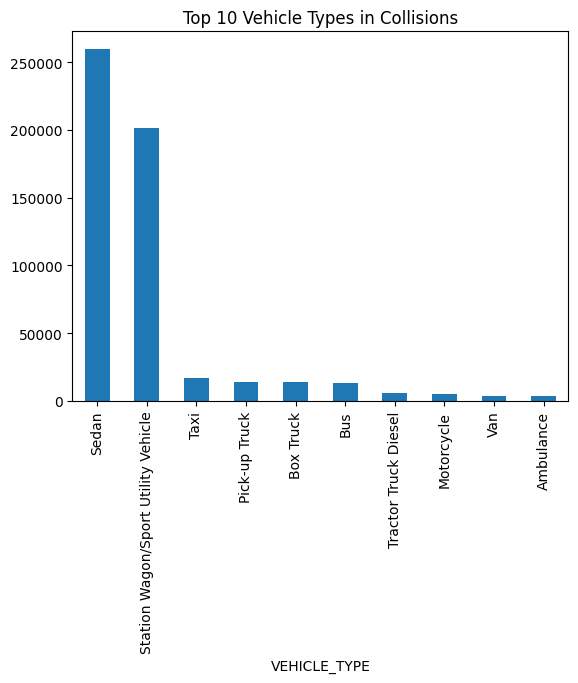

In [84]:
# Show only the top 10 vehicle types
top_vehicle_types = vehicle_type_counts.head(10)

top_vehicle_types.plot(kind='bar', title='Top 10 Vehicle Types in Collisions')
plt.xticks(rotation=90)  
plt.show()

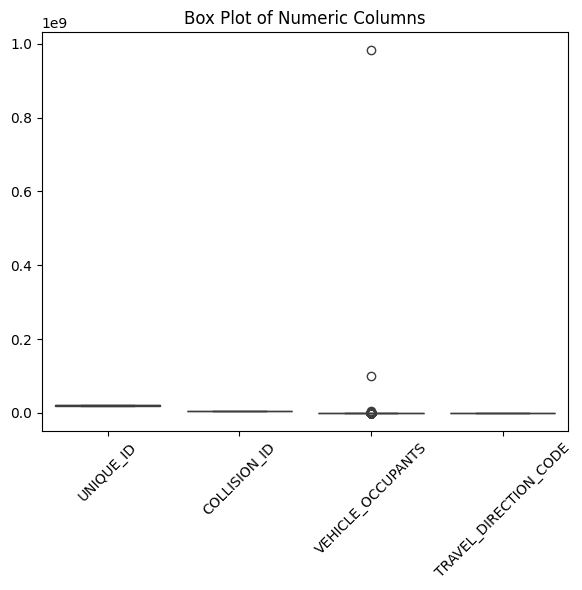

In [85]:
numeric_columns = motor_vehicle.select_dtypes(include=['number']).columns

# Check for outliers using box plots for numeric columns
plt.figure(figsize=(6, 6))
sns.boxplot(data=motor_vehicle[numeric_columns])
plt.title("Box Plot of Numeric Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Univariate Analysis

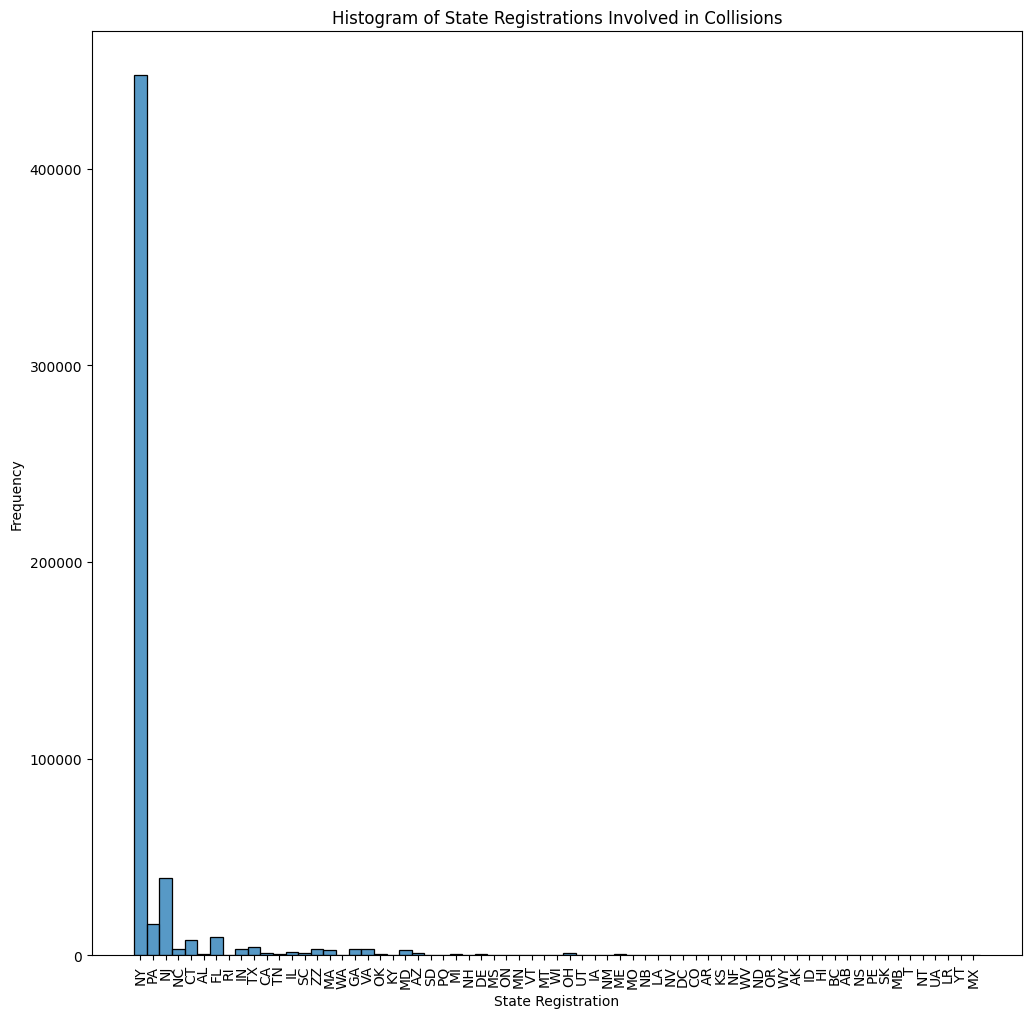

In [86]:
# Create a histogram-like plot for state registrations
plt.figure(figsize=(12, 12))
sns.histplot(motor_vehicle['STATE_REGISTRATION'], bins=10)  # Histogram for categorical data with a fixed bin count
plt.title('Histogram of State Registrations Involved in Collisions')
plt.xlabel('State Registration')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

C:\Users\smann\AppData\Local\Temp\ipykernel_32712\3811984909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='POINT_OF_IMPACT', data=motor_vehicle, palette='Set2')


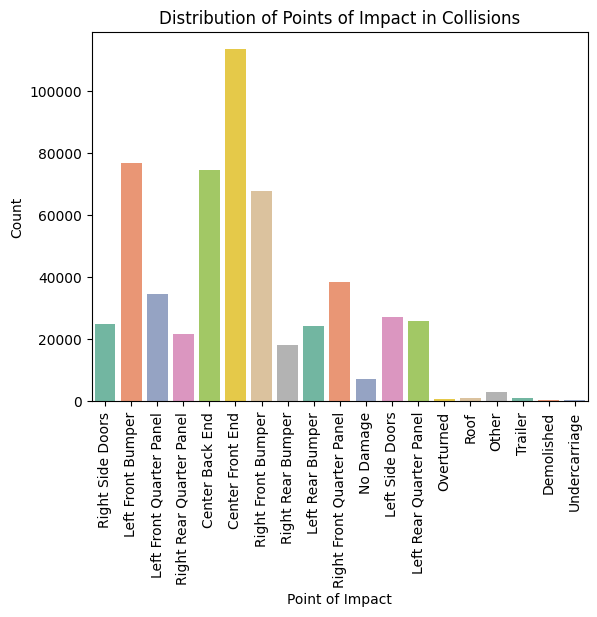

In [87]:
# Bar plot for point of impact with color palette
sns.countplot(x='POINT_OF_IMPACT', data=motor_vehicle, palette='Set2') 
plt.title('Distribution of Points of Impact in Collisions')
plt.xlabel('Point of Impact')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis

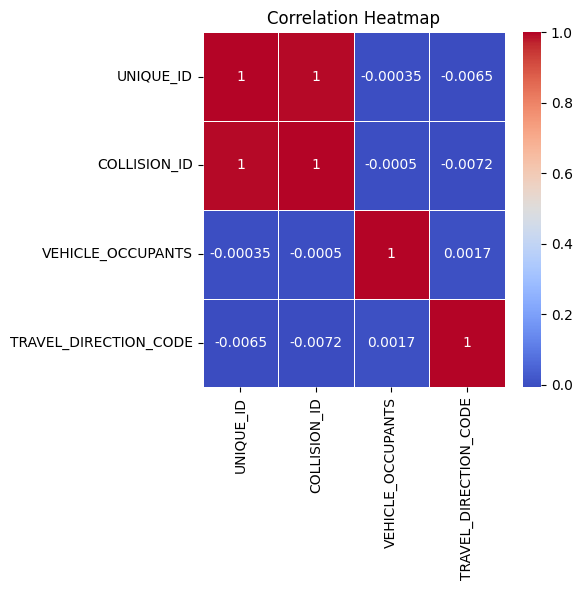

In [88]:
# Calculate correlation matrix
correlation_matrix = motor_vehicle[numeric_columns].corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Time Series Analysis

C:\Users\smann\AppData\Local\Temp\ipykernel_32712\961495612.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  motor_vehicle.set_index('CRASH_DATE').resample('M').size().plot(title='Crashes Over Time')


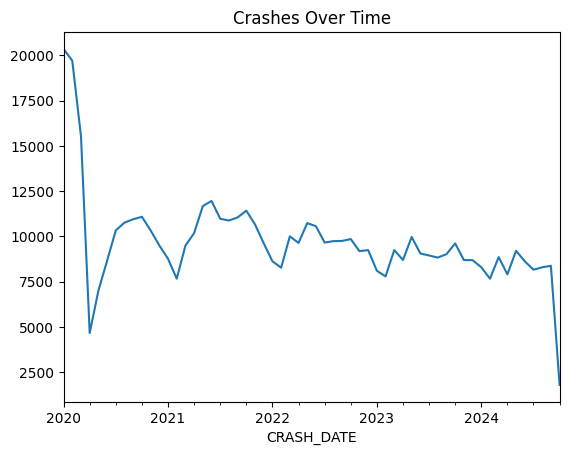

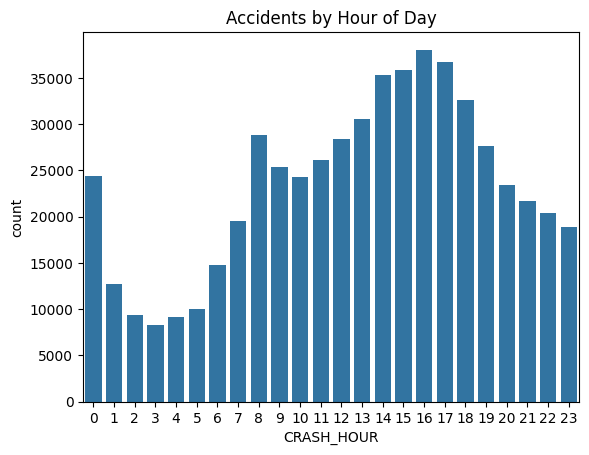

In [89]:
# Convert CRASH_DATE to datetime
motor_vehicle['CRASH_DATE'] = pd.to_datetime(motor_vehicle['CRASH_DATE'])

# Plot number of crashes over time
motor_vehicle.set_index('CRASH_DATE').resample('M').size().plot(title='Crashes Over Time')
plt.show()

# Accidents by hour
motor_vehicle['CRASH_HOUR'] = pd.to_datetime(motor_vehicle['CRASH_TIME'], format='%H:%M').dt.hour
sns.countplot(x='CRASH_HOUR', data=motor_vehicle)
plt.title('Accidents by Hour of Day')
plt.show()
